# Application de l'ACP sur le jeu de donneés de thegoodscents

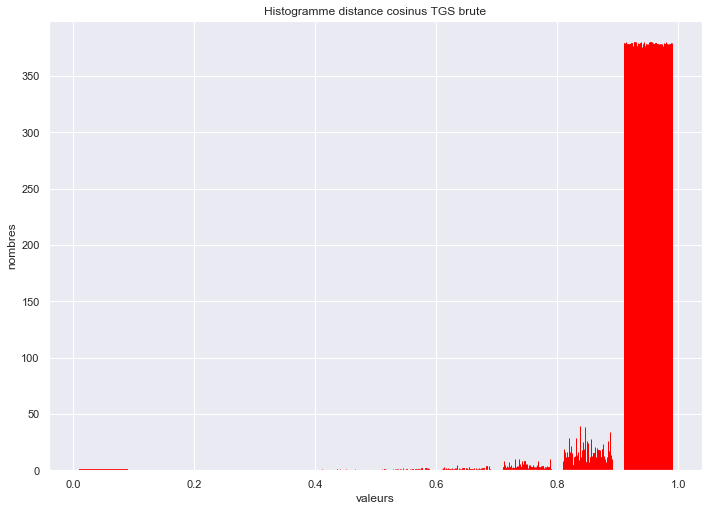

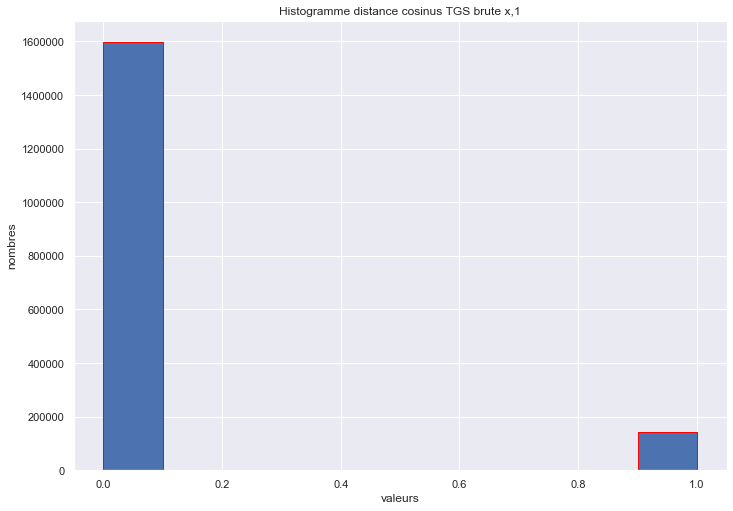

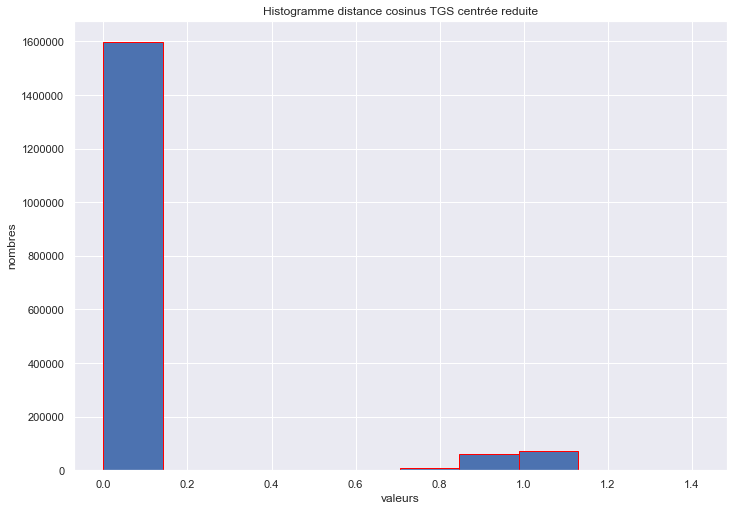

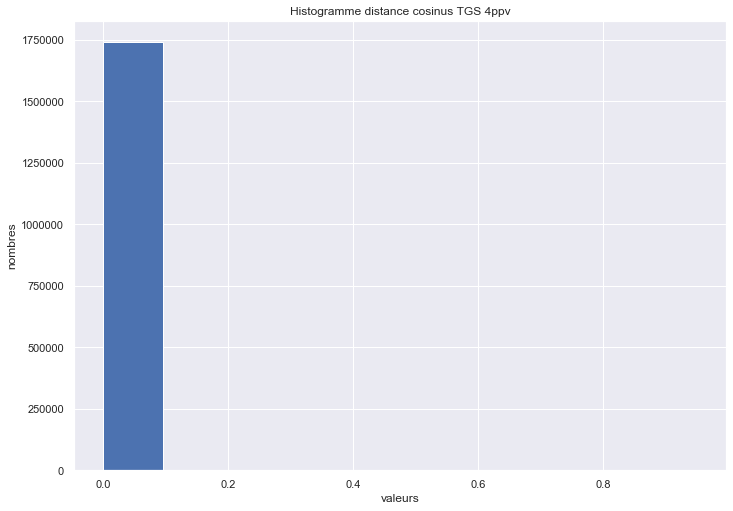

variance expliquer en fonction de l'axe
Eig val = 
[9.75247040e-02 4.78098821e-02 4.11551946e-02 3.62435367e-02
 3.16817611e-02 2.95728510e-02 2.43864145e-02 2.26679771e-02
 1.87926498e-02 1.70414920e-02 1.60916065e-02 1.52667876e-02
 1.48470267e-02 1.36892845e-02 1.34652845e-02 1.32715870e-02
 1.12754368e-02 1.07853183e-02 1.04008638e-02 9.79451698e-03
 9.39573886e-03 9.10919122e-03 8.72688704e-03 8.58454648e-03
 8.24452492e-03 7.89174652e-03 7.66816677e-03 7.47244676e-03
 7.27468720e-03 7.18254980e-03 6.90391884e-03 6.62641929e-03
 6.40143412e-03 6.30169908e-03 6.01082034e-03 5.87273011e-03
 5.66329240e-03 5.51814399e-03 5.49788554e-03 5.30045977e-03
 5.19967637e-03 5.03387305e-03 4.83777780e-03 4.73225389e-03
 4.68993622e-03 4.67862112e-03 4.59290950e-03 4.54713937e-03
 4.50902596e-03 4.40926162e-03 4.36024001e-03 4.31848439e-03
 4.23225410e-03 4.19235212e-03 4.14737442e-03 4.07780452e-03
 3.98140122e-03 3.81776997e-03 3.79766021e-03 3.70579541e-03
 3.69145498e-03 3.61896737e-03 3.5

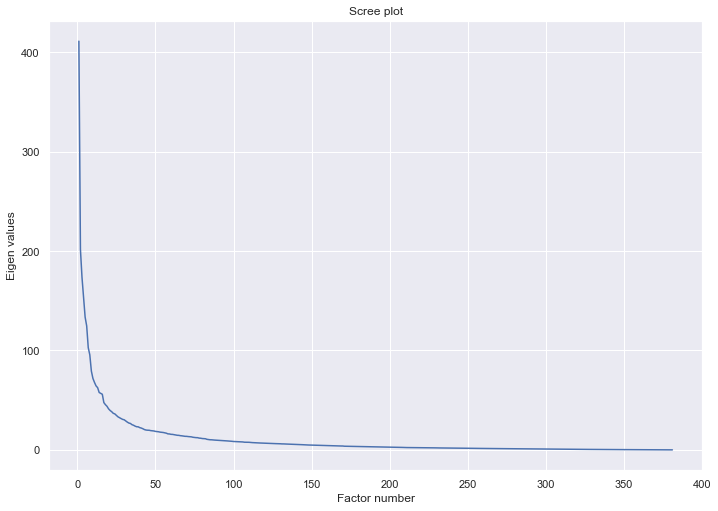

[[0.         1.0086358  1.01488242 ... 1.0156516  1.01701601 1.01300993]
 [1.0086358  0.         0.9497181  ... 0.95750027 0.96264431 1.0011715 ]
 [1.01488242 0.9497181  0.         ... 0.9030466  0.913987   0.99939528]
 ...
 [1.0156516  0.95750027 0.9030466  ... 0.         0.9276595  1.00156099]
 [1.01701601 0.96264431 0.913987   ... 0.9276595  0.         0.97136824]
 [1.01300993 1.0011715  0.99939528 ... 1.00156099 0.97136824 0.        ]]


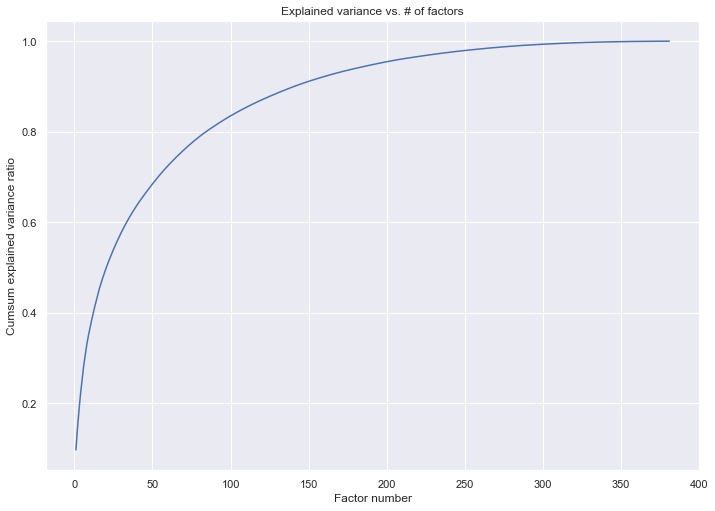

[t-SNE] Computing 61 nearest neighbors...
[t-SNE] Indexed 150 samples in 0.001s...
[t-SNE] Computed neighbors for 150 samples in 0.002s...
[t-SNE] Computed conditional probabilities for sample 150 / 150
[t-SNE] Mean sigma: 0.182240
[t-SNE] Computed conditional probabilities in 0.007s
[t-SNE] Iteration 50: error = 54.5067902, gradient norm = 1.2976840 (50 iterations in 0.054s)
[t-SNE] Iteration 100: error = 59.7810707, gradient norm = 0.3346671 (50 iterations in 0.061s)
[t-SNE] Iteration 150: error = 59.9730034, gradient norm = 0.5117505 (50 iterations in 0.057s)
[t-SNE] Iteration 200: error = 59.7873726, gradient norm = 0.7223901 (50 iterations in 0.057s)
[t-SNE] Iteration 250: error = 56.7266998, gradient norm = 0.3300060 (50 iterations in 0.057s)
[t-SNE] KL divergence after 250 iterations with early exaggeration: 56.726700
[t-SNE] Iteration 300: error = 0.8681920, gradient norm = 0.0036769 (50 iterations in 0.047s)
[t-SNE] Iteration 350: error = 0.8316159, gradient norm = 0.0008066 (

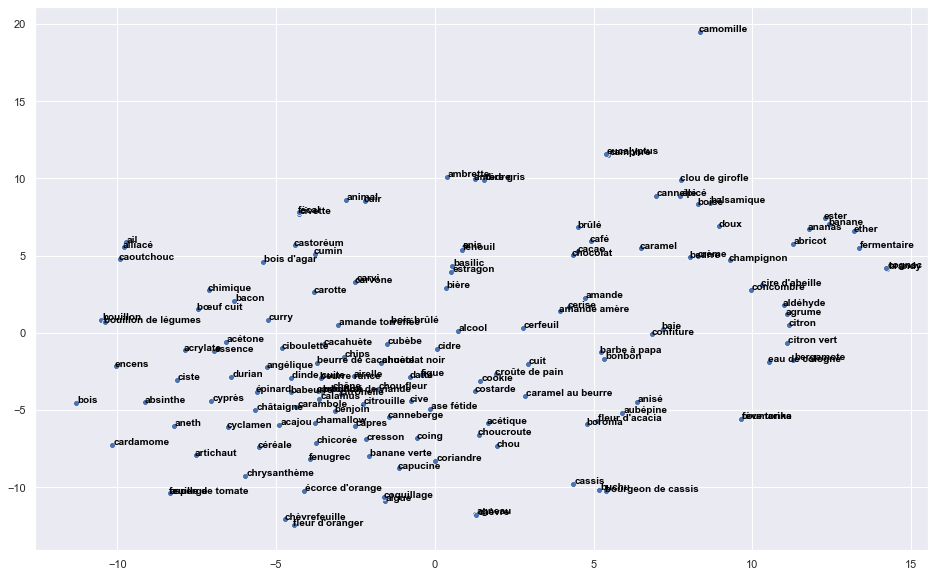

In [43]:
from sklearn.metrics.pairwise import cosine_distances
import pandas as pd
from sklearn.manifold import TSNE
import seaborn as sns
import numpy as np
X = pandas.read_csv("datagoodscents.csv",header=0,index_col=0)

#print(X[:0])
index = 0
headerText = np.empty(X.shape[1], dtype=object)
for col in X.columns: 
    headerText[index] = col
    index+=1;
#print(headerText)
#dimension
#print(X.shape) # (4573, 381)
X = X.T
#nombre d'observations
n = X.shape[0]
#nombre de variables
p = X.shape[1]

import sklearn

### Distance cosinus TGS brute
plt.hist(cosine_distances(X),
            edgecolor = 'red')
plt.xlabel('valeurs')
plt.ylabel('nombres')
plt.title('Histogramme distance cosinus TGS brute')
plt.show()

# Distance cosinus TGS brute 
# Matrice 4573 * 381 
index_matrice_distance = 0
matrice_distance = np.empty([1742313],dtype=float)
for row in cosine_distances(X):
    for index in row:
        matrice_distance[index_matrice_distance] = index
        index_matrice_distance+=1
        
plt.hist(matrice_distance,
            edgecolor = 'red')
plt.xlabel('valeurs')
plt.ylabel('nombres')
plt.title('Histogramme distance cosinus TGS brute x,1')
plt.show()
#classe pour standardisation
from sklearn.preprocessing import StandardScaler
#instanciation
sc = StandardScaler()

#transformation – centrage-réduction
Z = sc.fit_transform(X)
dist_Cosine = cosine_distances(Z)

index_matrice_distance = 0
matrice_distance_reduite = np.empty([1742313],dtype=float)
for row in dist_Cosine:
    for index in row:
        matrice_distance_reduite[index_matrice_distance] = index
        index_matrice_distance+=1
        

plt.hist(matrice_distance_reduite,
            edgecolor = 'red')
plt.xlabel('valeurs')
plt.ylabel('nombres')
plt.title('Histogramme distance cosinus TGS centrée reduite')
plt.show()
kppv_distance = np.empty([1742313],dtype=float)
index=0
for row in dist_Cosine:
    t = np.array(row)
    indices = t.argsort()
    indices = indices[t[indices] > 0]
    kppv_distance[index] = t[indices[0]]
    index+=1
    kppv_distance[index] = t[indices[1]]
    index+=1
    kppv_distance[index] = t[indices[2]]
    index+=1
    kppv_distance[index] = t[indices[3]]
    index+=1
    
plt.hist(kppv_distance)
plt.xlabel('valeurs')
plt.ylabel('nombres')
plt.title('Histogramme distance cosinus TGS 4ppv')
plt.show()
#print(np.array(np.mat(cosine_distances(Z))).describe(include= 'all'))
#classe pour l'ACP
from sklearn.decomposition import PCA
#instanciation
acp = PCA(svd_solver='full')

#calculs
coord = acp.fit_transform(Z)
#nombre de composantes calculées
#print(acp.n_components_) # 381

#variance expliquée
print("variance expliquer en fonction de l'axe")
#print(acp.explained_variance_)

#valeur corrigée de la variance expliquée
eigval = (p-1)/p*acp.explained_variance_
print("Eig val = ")
#print(eigval)

#proportion de variance expliquée
print(acp.explained_variance_ratio_)
import matplotlib.pyplot as plt
import numpy
plt.plot(numpy.arange(1,n+1),eigval)
plt.title("Scree plot")
plt.ylabel("Eigen values")
plt.xlabel("Factor number")
plt.show()

sns.set(rc={'figure.figsize':(11.7,8.27)})
palette = sns.color_palette("bright", 10)

embed_mat = coord[:150]
embed_mat_cosine = cosine_distances(embed_mat)
print(embed_mat_cosine)

#cumul de variance expliquée
plt.plot(numpy.arange(1,n+1),numpy.cumsum(acp.explained_variance_ratio_))
plt.title("Explained variance vs. # of factors")
plt.ylabel("Cumsum explained variance ratio")
plt.xlabel("Factor number")
plt.show()


#positionnement des individus dans le premier plan
fig, axes = plt.subplots(figsize=(100,100))
axes.set_xlim(-50,50) #même limites en abscisse
axes.set_ylim(-50,50) #et en ordonnée
#placement des étiquettes des observations
for i in range(n):
    plt.annotate(X.index[i],(coord[i,0],coord[i,1]))
#ajouter les axes
plt.plot([-50,50],[0,0],color='silver',linestyle='-',linewidth=1)
plt.plot([0,0],[-50,50],color='silver',linestyle='-',linewidth=1)
#affichage
plt.show()

tsne = TSNE(n_components=2,metric='precomputed',verbose=2,n_iter=2000,perplexity=20,early_exaggeration = 12,learning_rate=10)
X_embedded = tsne.fit_transform(embed_mat_cosine)


df_subset = {} 
df_subset['tsne-2d-one'] = X_embedded[:,0]
df_subset['tsne-2d-two'] = X_embedded[:,1]
plt.figure(figsize=(16,10))
p1 = sns.scatterplot(X_embedded[:,0], X_embedded[:,1], legend='full', palette=palette)
index = 0
for line in range(0,embed_mat_cosine.shape[0]):
    if index%2 == 0:
        decalage = 0.03
    else:
        decalage = -0.03
    p1.text(df_subset['tsne-2d-one'][line]+decalage, df_subset['tsne-2d-two'][line]+decalage, 
     headerText[line], horizontalalignment='left', size='small', color='black', weight='semibold')
    index+=1


# Application de l'ACP sur le jeu de données d'Oniris

(54, 70)
70


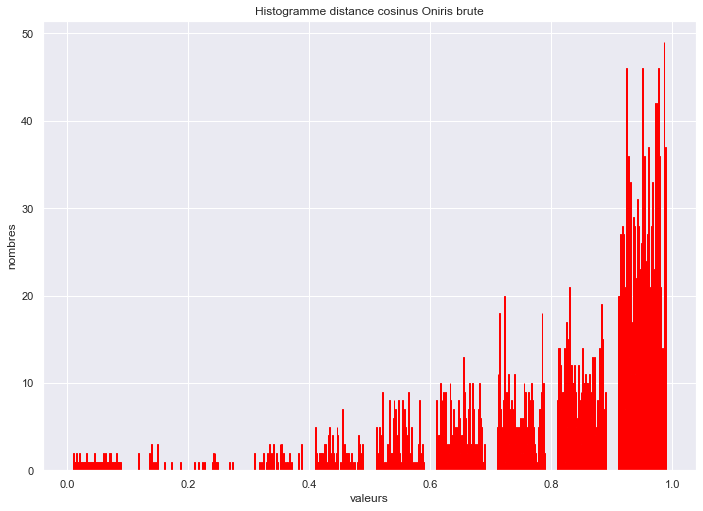

                  1   2   3   4   5   6   7   8   9   10  ...  61  62  63  64  \
à noyaux           0   0   0   0   0   0   0   1   0   1  ...   0   0   0   0   
agrumes            0   0   0   0   0   0   0   0   0   0  ...   0   0   0   0   
alcool             0   1   4   0   0   0   0  14   0   0  ...   0   0   0   0   
aldehyde           0   0   1   0   0   0   1   1   0   0  ...   0   0   0   1   
amande amère       0   0   0   0   0   0   0   0   0   0  ...   0   0   0   0   
amylique           0   0   1   0   1   0   2   1   5  42  ...   0   0   0   0   
animal             0   4   0   0   2   0   3   0   0   0  ...   0   0   0   1   
anise              0   0   0   0   0   0   0   0   0   0  ...   0   0   0   0   
autre              0   0   1   0   0   0   0   1   0   0  ...   0   0   0   0   
beurre             0   1   0   0   0   0   0   0   0   1  ...   0   0   0   0   
boise              0   0   0   0   0   1   1   0   0   1  ...   1   0   0   0   
caramel            0   0   0

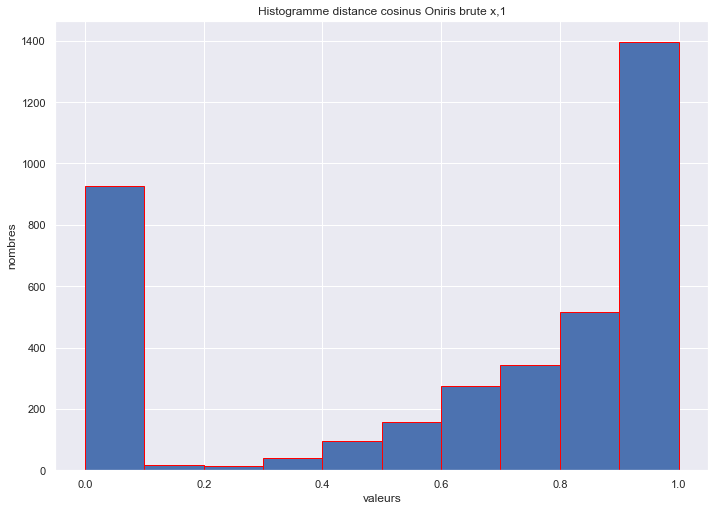

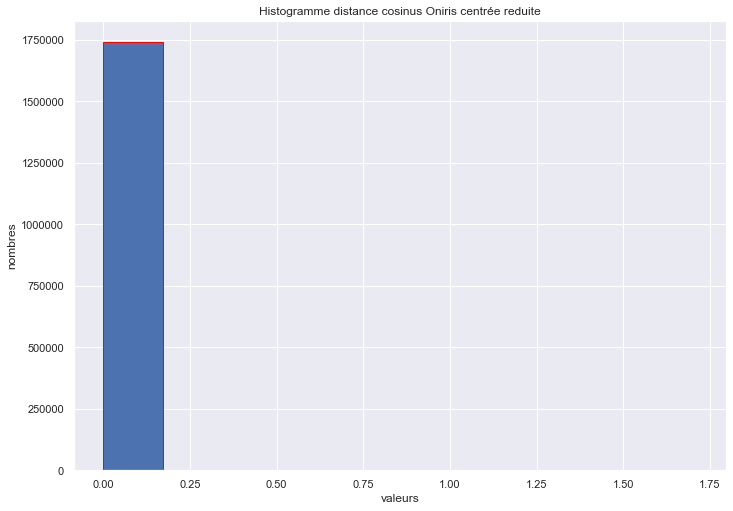

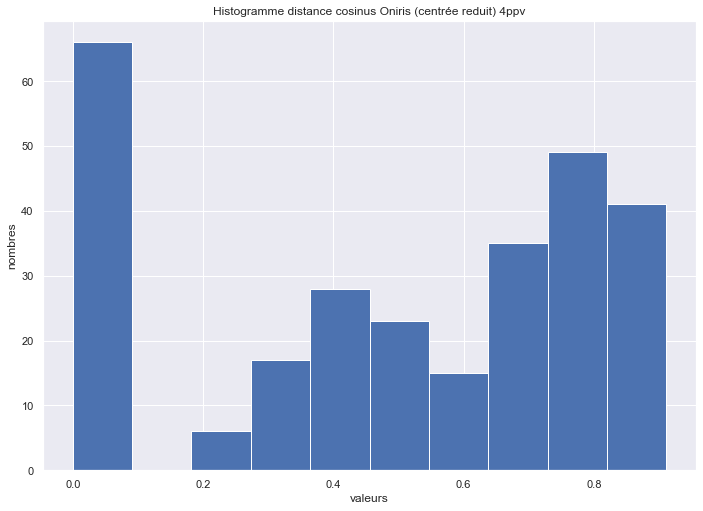

54
variance expliquer en fonction de l'axe
[1.44473413e+01 1.02032185e+01 5.50578712e+00 4.17236079e+00
 3.41852649e+00 3.21572026e+00 2.29455195e+00 2.01918298e+00
 1.98924949e+00 1.87775731e+00 1.82010151e+00 1.72123013e+00
 1.63865500e+00 1.42454497e+00 1.38600227e+00 1.30457203e+00
 1.20830854e+00 1.13054200e+00 1.04160496e+00 9.95584791e-01
 8.99042329e-01 8.00795407e-01 7.96513315e-01 7.76839164e-01
 6.44503093e-01 6.30282096e-01 5.34157623e-01 4.44521877e-01
 4.31365538e-01 3.63768431e-01 3.43224842e-01 2.82397234e-01
 2.68003465e-01 2.32090255e-01 1.95737358e-01 1.59521795e-01
 1.48411520e-01 1.15948188e-01 9.79070551e-02 7.59930529e-02
 6.57977935e-02 4.44939350e-02 3.59038657e-02 3.08994427e-02
 2.73638435e-02 2.20952152e-02 1.51727002e-02 1.23500426e-02
 1.08119140e-02 2.84923568e-30 1.57948349e-31 1.27104966e-31
 8.26754579e-32 4.35214179e-32]
Eig val = 
(54,)
[2.02568542e-01 1.43061000e-01 7.71975442e-02 5.85013550e-02
 4.79317206e-02 4.50881412e-02 3.21722892e-02 2.831129

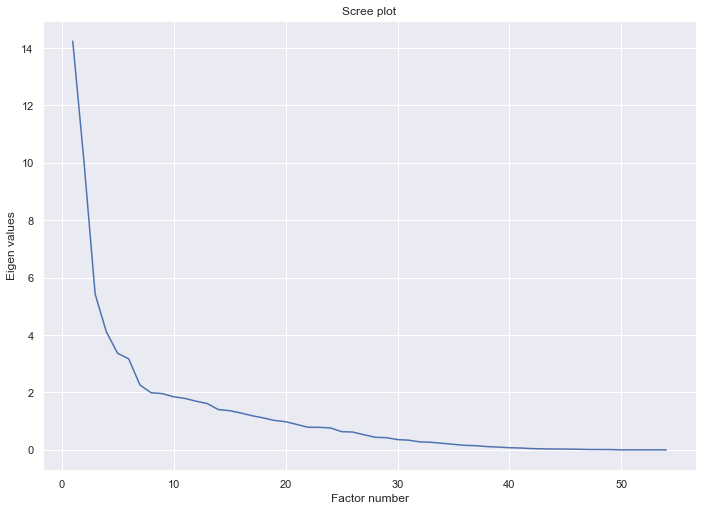

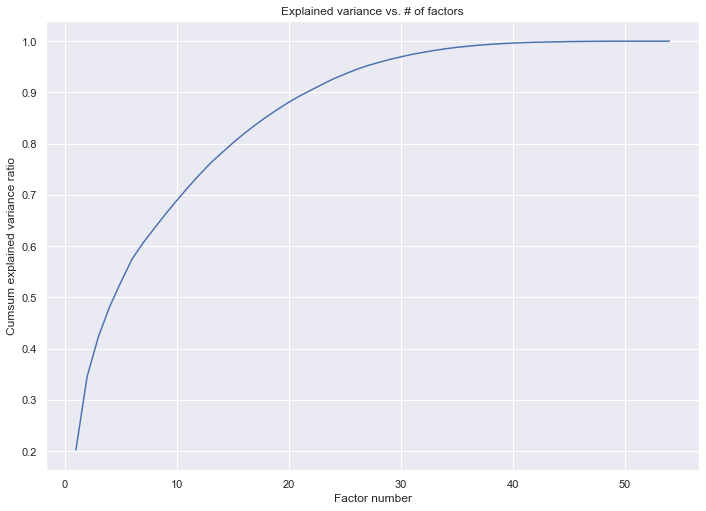

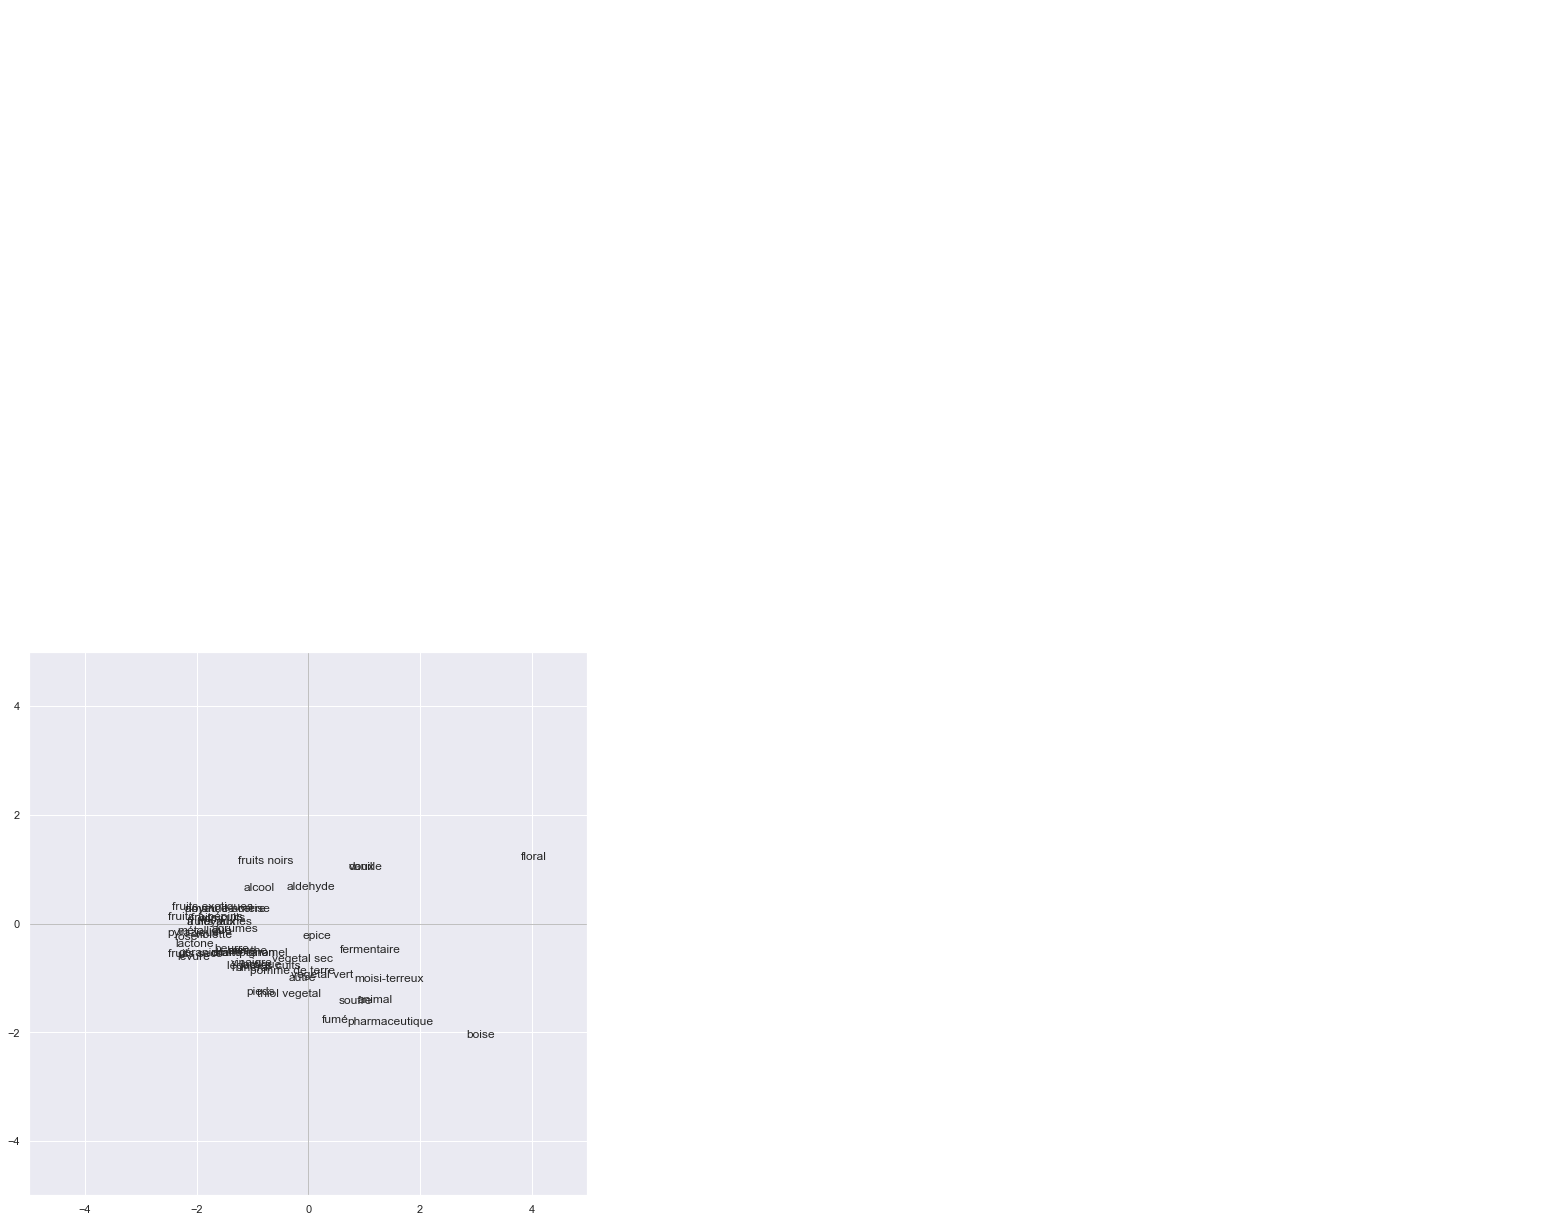

In [45]:
from sklearn.metrics.pairwise import cosine_distances
import pandas
from sklearn.manifold import TSNE
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

X = pandas.read_csv("dataOniris.csv",header=0,index_col=0)
X = X.T
#dimension
print(X.shape) # (70, 54)
#nombre d'observations
n = X.shape[0]
#nombre de variables
p = X.shape[1]
print(p)
plt.hist(cosine_distances(X),
            edgecolor = 'red')
plt.xlabel('valeurs')
plt.ylabel('nombres')
plt.title('Histogramme distance cosinus Oniris brute')
plt.show()
print(X)

index_matrice_distance = 0
matrice_distance = np.empty([3780],dtype=float)
for row in cosine_distances(X):
    for index in row:
        matrice_distance[index_matrice_distance] = index
        index_matrice_distance+=1
        
plt.hist(matrice_distance,
            edgecolor = 'red')
plt.xlabel('valeurs')
plt.ylabel('nombres')
plt.title('Histogramme distance cosinus Oniris brute x,1')
plt.show()

import sklearn

#classe pour standardisation
from sklearn.preprocessing import StandardScaler
#instanciation
sc = StandardScaler()
#transformation – centrage-réduction
Z = sc.fit_transform(X)
dist_Cosine = cosine_distances(Z)
index_matrice_distance = 0
matrice_distance_reduite = np.empty([1742313],dtype=float)
for row in dist_Cosine:
    for index in row:
        matrice_distance_reduite[index_matrice_distance] = index
        index_matrice_distance+=1
        

plt.hist(matrice_distance_reduite,
            edgecolor = 'red')
plt.xlabel('valeurs')
plt.ylabel('nombres')
plt.title('Histogramme distance cosinus Oniris centrée reduite')
plt.show()

kppv_distance = np.empty([280,1],dtype=float)
index=0
for row in dist_Cosine:
    t = np.array(row)
    indices = t.argsort()
    indices = indices[t[indices] > 0]
    kppv_distance[index] = t[indices[0]]
    index+=1
    kppv_distance[index] = t[indices[1]]
    index+=1
    kppv_distance[index] = t[indices[2]]
    index+=1
    kppv_distance[index] = t[indices[3]]
    index+=1
    
plt.hist(kppv_distance)
plt.xlabel('valeurs')
plt.ylabel('nombres')
plt.title('Histogramme distance cosinus Oniris (centrée reduit) 4ppv')
plt.show()

#classe pour l'ACP
from sklearn.decomposition import PCA
#instanciation
acp = PCA(svd_solver='full')

#calculs
coord = acp.fit_transform(Z)
#nombre de composantes calculées
print(acp.n_components_) # 70

#variance expliquée
print("variance expliquer en fonction de l'axe")
print(acp.explained_variance_)

#valeur corrigée de la variance expliquée
eigval = (p-1)/p*acp.explained_variance_
print("Eig val = ")
print(eigval.shape)

#proportion de variance expliquée
print(acp.explained_variance_ratio_)
import matplotlib.pyplot as plt
import numpy
plt.plot(numpy.arange(1,n+1),eigval)
plt.title("Scree plot")
plt.ylabel("Eigen values")
plt.xlabel("Factor number")
plt.show()


#cumul de variance expliquée
plt.plot(numpy.arange(1,n+1),numpy.cumsum(acp.explained_variance_ratio_))
plt.title("Explained variance vs. # of factors")
plt.ylabel("Cumsum explained variance ratio")
plt.xlabel("Factor number")
plt.show()


#positionnement des individus dans le premier plan
fig, axes = plt.subplots(figsize=(10,10))
axes.set_xlim(-5,5) #même limites en abscisse
axes.set_ylim(-5,5) #et en ordonnée
#placement des étiquettes des observations
for i in range(n):
    plt.annotate(X.index[i],(coord[i,0],coord[i,1]))
#ajouter les axes
plt.plot([-6,6],[0,0],color='silver',linestyle='-',linewidth=1)
plt.plot([0,0],[-6,6],color='silver',linestyle='-',linewidth=1)
#affichage
plt.show()


In [13]:
print(np.array(np.mat(cosine_distances(Z))).describe(include= 'all'))
#classe pour l'ACP

AttributeError: 'numpy.ndarray' object has no attribute 'describe'